Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
13/11/2017
</small></small></p>

## integración numérica

Las leyes de evolución de muchos sistemas se expresan mediante  [ecuaciones diferenciales](https://en.wikipedia.org/wiki/Differential_equation).  Aparecen en todos los campos de la física y se estudiarán en profundidad en otras asignaturas: las ecuaciones de Newton, Lagrange y Hamilton en mecánica clásica, las ecuaciones de Maxwell en electromagnetismo, la ecuación de Schrödinger en mecánica cuántica, etc.

Estas ecuaciones expresan ciertas propiedades matemáticas que tiene que cumplir la solución del problema, pero no la solución propiamente dicha, que no siempre es fácil de encontrar de forma analítica.
Por ejemplo, si un cuerpo sufre una fuerza constante tenemos un sencillo movimiento uniformemente acelerado, pero si la fuerza depende de la posición (como ocurre en la órbita de un satélite) se producirá un fenómeno interesante: la trayectoria dependerá de las aceleraciones sufridas, que dependen a su vez de la trayectoria.


Un caso sencillo es el de un cuerpo sujeto a un muelle ([oscilador armónico](https://en.wikipedia.org/wiki/Harmonic_oscillator)). La fuerza es proporcional al desplazamiento: $F=-kx$, por lo que la trayectoria es la solución de
$\,{m \ddot x = - k x}$. Otro ejemplo es la [desintegración radioactiva](https://en.wikipedia.org/wiki/Radioactive_decay#Universal_law_of_radioactive_decay), donde la cantidad de sustancia cumple $\,\dot x = - \lambda x$. (Usamos la [notación de Newton](https://en.wikipedia.org/wiki/Notation_for_differentiation#Newton.27s_notation), que utiliza puntos encima de las variables para indicar las derivadas respecto al tiempo.) 

Estas ecuaciones tan simples se pueden resolver por inspección, recordando las derivadas de las funciones seno, coseno y exponencial. En cambio, las ecuaciones diferenciales que aparecen en situaciones más complejas son muy difíciles, o imposibles, de resolver analíticamente. Pero no todo está perdido: mediante cálculo numérico se pueden conseguir soluciones numéricas muy precisas. En este capítulo presentaremos las herramientas informáticas disponibles para esta tarea.

Hay una gran diferencia entre una solución analítica como $x(t)=A \sin(\omega t)$ y una solución numérica como la siguiente:

    t     x(t)
    -----------
    0.0   2.00
    0.1   1.97
    0.2   1.84
    ...   ....
    
Las soluciones analíticas son generales, válidas para diferentes valores de los parámetros, y se pueden estudiar sus propiedades mediante análisis matemático.

Las soluciones numéricas solo pueden construirse con valores definidos de los parámetros y con unas condiciones iniciales dadas. Sirven para contestar a la pregunta "¿qué pasaría en este caso concreto?"  Afortunadamente los ordenadores pueden simular muchas situaciones diferentes en un tiempo razonable, lo que permite resolver problemas de gran complejidad. Pero siempre es imprescindible comprobar la validez física de los resultados: las herramientas computacionales y el análisis matemático son métodos complementarios.


### Método de Euler

El [método de Euler](https://en.wikipedia.org/wiki/Euler_method) sirve para resolver ecuaciones diferenciales mediante una aproximación numérica a la derivada de una función.
Para un $\Delta t = t _ {k+1} - t _ k$ suficientermente pequeño podemos aproximar la derivada como el cociente de incrementos finitos:

$$\frac{dx}{dt}(t_k) \simeq \frac{\Delta x}{\Delta t} = \frac{x(t _ {k+1})-x(t _ k)}{t _ {k+1} - t _ k}$$

Si conocemos la función y su derivada en un punto $t _ k$ podemos obtener una aproximación a su valor en un punto muy próximo:

$$ x(t _ {k+1}) \simeq x(t _ k) + \Delta t \frac{dx}{dt}(t_k) $$

La función se irá construyendo en posiciones discretas partiendo de unas condiciones iniciales dadas.
El intervalo de integración $\Delta t$ se elige de un tamaño suficientemente pequeño como para que la derivada de la función sea aproximadamente constante entre muestras.

Por ejemplo, si deseamos resolver la ecuación diferencial

$$ \dot x = -0.95 x$$

con condición inicial $x(0)=5$ hacemos lo siguiente:

In [1]:
x = 5
Δt = 0.01

for _ in range(10):
    x += Δt * (-0.95)*x
    print(x)

4.9525
4.90545125
4.858849463125
4.812690393225313
4.7669698344896725
4.721683621062021
4.6768276266619315
4.632397764208643
4.588389985448661
4.544800280586898


Por supuesto, es mucho mejor representar la solución gráficamente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

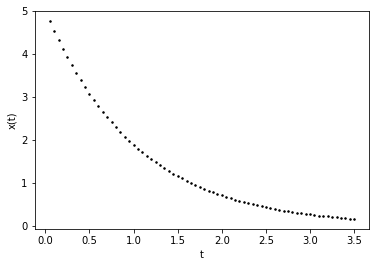

In [3]:
x = 5
Δt = 0.05
t = 0

for _ in range(70):
    x += Δt* (-0.95)*x
    t += Δt
    plt.plot([t],[x],'.',color='black',markerSize=3);

plt.xlabel('t'); plt.ylabel('x(t)');

Cuando la ecuación diferencial contiene una segunda derivada el método de Euler se aplica en 2 pasos. Por ejemplo, para resolver la ecuación del oscilador armónico $m \ddot x = -K x$ con $K=30$  y $m=2$,  para $x(0)=-2$ y $\dot x(0)=0$ podemos escribir el siguiente código. (En este ejemplo vamos a guardar todos los valores calculados de la función y su derivada en arrays para representarlos gráficamente de forma más cómoda.)

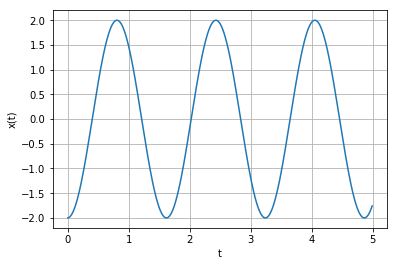

In [4]:
x0 = -2
v0 = 0
K = 30
m = 2

dt = 0.01

t = np.arange(0,5,dt)
n = len(t)
x = np.zeros(n)
v = np.zeros(n)

x[0] = x0
v[0] = v0

for j in range(n-1):
    a      = -(K/m)*x[j]
    v[j+1] = v[j] + dt * a
    x[j+1] = x[j] + dt * v[j+1]

plt.plot(t,x); plt.xlabel('t'); plt.ylabel('x(t)'); plt.grid();

Observa que en este caso vamos calculando los elementos de `x` y `v` a partir de los elementos en la posición anterior. Estos arrays se han creado al principio con el tamaño adecuado. 

El siguiente ejemplo es un tiro parabólico sin fricción (en dos dimensiones). 

$$\begin{aligned}
\ddot x &= 0\\
\ddot y &= -g
\end{aligned}$$

Es un problema de segundo orden como el anterior, pero al ser en 2D necesitamos calcular la evolución de cuatro variables. De nuevo usamos arrays para guardar la solución. 

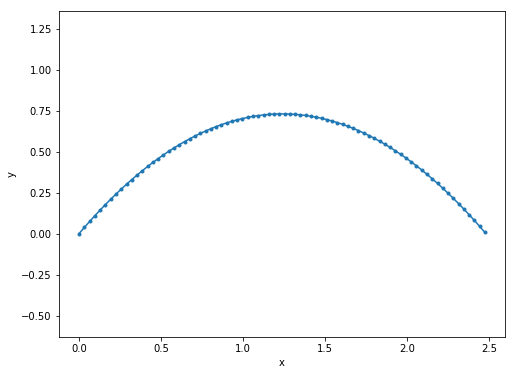

In [5]:
deg = np.pi/180

v0 = 5
angle = 50*deg

dt = 0.01
t = np.arange(0,5,dt)
n = len(t)
x  = np.zeros(n)
y  = np.zeros(n)
vx = np.zeros(n)
vy = np.zeros(n)

x[0] = 0
y[0] = 0
vx[0] = v0*np.cos(angle)
vy[0] = v0*np.sin(angle)

g = -9.8

for j in range(n-1):
    ax   = 0
    ay   = g
    vx[j+1] = vx[j] + dt * ax
    vy[j+1] = vy[j] + dt * ay
    x[j+1]  = x[j]  + dt * vx[j+1]
    y[j+1]  = y[j]  + dt * vy[j+1]

ok = y >= 0

plt.figure(figsize=(8,6))
plt.plot(x[ok],y[ok],'.-'); plt.axis('equal'); plt.xlabel('x'); plt.ylabel('y');

Con la máscara `ok` seleccionamos solo los puntos de la trayectoria que están por encima del suelo.

En realidad no es muy elegante separar las componentes de la posición y velocidad en arrays individuales. El código anterior puede simplificarse un poco usando arrays de dos dimensiones. Es lo que haremos en el siguiente ejemplo, en el que además añadimos fricción proporcional a la velocidad.

$$\begin{aligned}
\ddot x &= -\phi \dot x\\
\ddot y &= -\phi \dot y - g
\end{aligned}$$

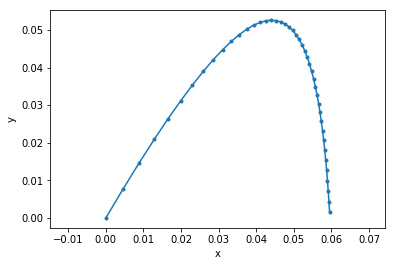

In [6]:
deg = np.pi/180

V0 = 2
ang = 60*deg
f = 15

dt = 0.005
t = np.arange(0,5,dt)
n = len(t)
r = np.zeros([n,2])
v = np.zeros([n,2])

r[0] = 0,0
v[0] = V0*np.cos(ang), V0*np.sin(ang)
g = np.array([0,-9.8])

for j in range(n-1):
    a      = g - f*v[j]
    v[j+1] = v[j] + dt * a
    r[j+1] = r[j] + dt * v[j+1]

    
x,y = r.T
ok = y >= 0

plt.plot(x[ok],y[ok],'.-'); plt.axis('equal'); plt.xlabel('x'); plt.ylabel('y');

Este problema se resuelve numéricamente de forma muy sencilla, con cambios mínimos respecto al anterior, mientras que una solución analítica es mucho más complicada.

Una vez que tenemos los datos de la trayectoria podemos crear una animación. (No te preocupes mucho de la forma de programar esto en una primera lectura.)

In [7]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(( 0, 0.07 )); plt.xlabel('x')
ax.set_ylim(( 0, 0.07)); plt.ylabel('y')
plt.grid()
plt.close();

[punto] = ax.plot([],[],'.',color='black',markerSize=20)
[linea] = ax.plot([],[],'-',color='gray',ls='dashed')

def animate(k):
    linea.set_data(x[:k],y[:k])
    punto.set_data(x[k-1],y[k-1])
    return ()

animation.FuncAnimation(fig, animate, init_func=lambda:[], frames=3+len(x[ok]), interval=1000/20, blit=True)

## integrador numérico de Python

El método de Euler es muy sencillo de entender y programar pero no es adecuado para resolver con precisión ecuaciones más complejas.

El módulo científico `scipy` proporciona un integrador general de ecuaciones diferenciales llamado [odeint](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html).
Esta función requiere ecuaciones **vectoriales** de **primer** orden. Cada ecuación concreta que deseemos resolver debe reescribirse, con las variables auxiliares que sean precisas, de la siguiente forma:

$$\dot{ \vec s} = f(\vec s, t)$$

Por ejemplo, si tenemos que resolver

$$\ddot{x}+0.1\dot{x}+0.95x=0$$

para $x(0)=10$, $\dot{x}(0)=0, t\in[0,20]$, lo expresamos con la variable axiliar $v = \dot x$ como:


$$ \begin{aligned}
\dot x &= v \\
\dot v &= -0.1 v - 0.95 x
\end{aligned}$$


Lo único que tenemos que hacer es escribir el código Python correspondiente a la función $f$ que calcula las derivadas. Normalmente la llamaremos `sdot` o un nombre parecido. Tiene dos argumentos: un contenedor con las variables de estado y el tiempo. Su estructura es muy parecida en todos los problemas: extraemos las variables de estado con nombres más intuitivos, calculamos las derivadas que correspondan (algunas suelen venir directamente en el vector de estado) y las devolvemos en el orden correcto.

In [9]:
def sdot(s,t):
    x,v = s              # desglosamos el estado
    a = -0.95*x-0.1*v
    return v,a           # v es la derivada de x, a es la derivada de v

Finalmente, llamamos al integrador `odeint` con la función de derivación `sdot`, el estado inicial, y un array de tiempos (variable independiente) en los que deseamos obtener la solución. No hay que preocuparse de elegir un intervalo de integración adecuado. Se elige internamente de forma automática, independientemente del vector de tiempos donde pedimos el resultado.

In [10]:
from scipy.integrate import odeint

t = np.linspace(0,20,300)
r = odeint(sdot,[10,0],t)

r[:5]

array([[ 10.        ,   0.        ],
       [  9.97880226,  -0.6328824 ],
       [  9.91548732,  -1.25886547],
       [  9.8106041 ,  -1.87534429],
       [  9.66487389,  -2.47977143]])

El resultado es un array 2D cuyas filas son los valores de $s(t)$ correspondientes a cada $t$. Para hacer una gráfica de la evolución de cada variable extraemos las columnas:

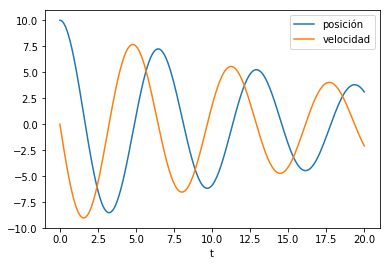

In [11]:
plt.plot(t,r[:,0],label='posición')
plt.plot(t,r[:,1],label='velocidad');
plt.legend(); plt.xlabel('t');

En vez de acceder cada vez a las columnas del resultado es más cómodo ponerles nombres. Esto se puede hacer fácilmente transponiendo la matriz:

In [12]:
x,v = r.T

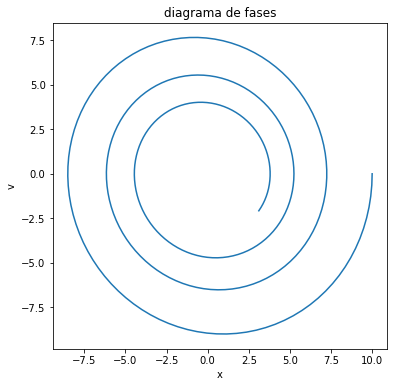

In [13]:
plt.figure(figsize=(6,6)); plt.title('diagrama de fases');
plt.plot(x,v); plt.xlabel('x'); plt.ylabel('v');

Veamos otro ejemplo: el tiro parabólico con fricción que hemos resuelto con el método de Euler más arriba se resolvería con `odeint` de la forma siguiente. Recordamos que las ecuaciones son:

$$\begin{aligned}
\ddot x &= -\phi \dot x\\
\ddot y &= -\phi \dot y - g
\end{aligned}$$

En este caso el sistema de dos ecuaciones y orden dos se tiene que expresar como un sistema de cuatro ecuaciones de primer orden. El código Python de la función `sdot` correspondiente se muestra a continuación, junto con la preparación de un caso concreto.

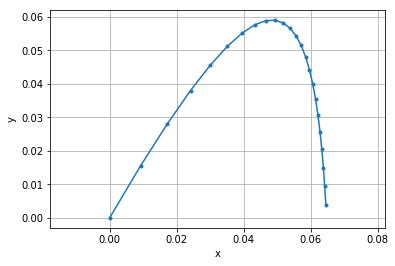

In [14]:
deg = np.pi/180

v = 2
a = 60*deg

vx0 = v*np.cos(a)
vy0 = v*np.sin(a)

f = 15
g = -9.8

dt = 0.01

t = np.arange(0,5,dt)

def sdot(s,t):
    x,y,vx,vy = s
    ax =   -f*vx
    ay = g -f*vy
    return vx,vy,ax,ay

x,y,vx,vy = odeint(sdot,(0,0,vx0,vy0),t).T

ok = y >= 0

plt.plot(x[ok],y[ok],'.-'); plt.grid();
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal');

De nuevo usamos una máscara para seleccionar en el gráfico los puntos de la trayectoria que están por encima del suelo.

El ejemplo anterior puede adaptarse fácilmente para calcular la órbita de un satélite. En función del [standard gravitational parameter](https://en.wikipedia.org/wiki/Standard_gravitational_parameter) $\mu=GM$ la ecuación del movimiento es

$$\ddot {\vec r} = - \frac{\mu}{||\vec r ||^2} \frac{\vec r}{||\vec r ||}$$

Vamos a resolver un caso ficticio para comprobar el código.

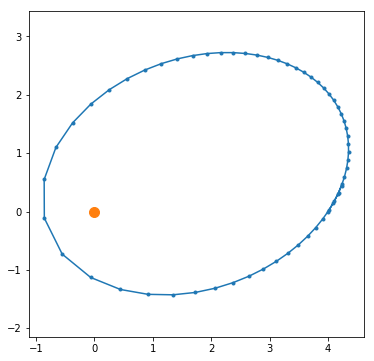

In [15]:
from scipy.integrate import odeint

mu = 1  # GM

def zdot(z,t):
    x,y,vx,vy = z
    d = (x**2 + y**2)**(1/2)
    ax = -mu*x/d**3
    ay = -mu*y/d**3
    return vx,vy,ax,ay

t = np.arange(0,30,0.5)

x,y,vx,vy = odeint(zdot,[4,0,0.2,0.3],t).T

plt.figure(figsize=(6,6))
plt.plot(x,y,'.-');
plt.plot([0],[0],'.',markerSize=20)
plt.axis('equal');

## partículas en una caja

Cuando deseamos simular sistemas en los que casi todo el tiempo los objetos se mueven a velocidad constante, o donde interesa estudiar el comportamiento global sin preocuparnos mucho de los detalles, no es necesario un integrador preciso y podemos usar el sencillo método de Euler. Un caso típico es el de la simulación de partículas puntuales en una caja. Simplemente hay que programar un movimiento uniforme con arrays de posiciones y velocidades.

En este caso lo mejor es visualizar directamente el resultado mediante una animación. Preparamos arrays con las posiciones y velocidades de las partículas, que inicialmente ponemos como aleatorias, y en cada fotograma de la animación realizamos un paso de integración. Inicialmente no ponemos límites al movimiento de las partículas.

In [16]:
n = 1000

x = 0.2 + 0.3  * np.random.rand(n,2)
v = 0.01 * np.random.randn(n,2)

dt = 1

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(( 0,1 )); plt.xlabel('x')
ax.set_ylim(( 0, 1)); plt.ylabel('y')
plt.close();

[puntos] = ax.plot([],[],'.',color='black',markerSize=8)

def animate(k):
    global x, v

    x += v * dt
    
    puntos.set_data(x[:,0],x[:,1])
    return ()

animation.FuncAnimation(fig, animate, init_func=lambda:[],frames=5*30, interval=1000/30, blit=True)

En el siguiente ejemplo simulamos rebotes contra las paredes de la caja. Para ello guardamos en una variable axiliar `xs` la posición siguiente de cada partícula y evaluamos una máscara `reb` que indica las componentes de velocidad que deben cambiar de sentido. Gracias a `numpy` esto se realiza mediante la sencilla operación de la línea 19, que está calculando "simultáneamente" la "OR" lógica, elemento a elemento, de arrays lógicos de dimensión $n\times2$. Finalmente se aplica el paso de integración con las velocidades corregidas.

In [17]:
n = 1000

x = 0.2 + 0.3  * np.random.rand(n,2)
v = 0.01 * np.random.randn(n,2)

dt = 1

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(( 0,1 )); plt.xlabel('x')
ax.set_ylim(( 0, 1)); plt.ylabel('y')
plt.close();

[puntos] = ax.plot([],[],'.',color='black',markerSize=8)

def animate(k):
    global x, v
    xs = x + v * dt
    reb = (xs > 1) |  (xs < 0)
    v[reb] *= -1
    x += v * dt
    
    puntos.set_data(x[:,0],x[:,1])
    return ()

animation.FuncAnimation(fig, animate, init_func=lambda:[], frames=5*30, interval=1000/30, blit=True)

Finalmente, con una modificación muy simple podemos simular la aceleración de la gravedad y choques inelásticos contra las paredes.

In [18]:
n = 100

x = 0.4 + 0.3  * np.random.rand(n,2)
v = 0.01 * np.random.randn(n,2)

a = 0, -0.001

dt = 1

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(( 0,1 )); plt.xlabel('x')
ax.set_ylim(( 0, 1)); plt.ylabel('y')
plt.close();

[puntos] = ax.plot([],[],'.',color='black',markerSize=8)

def animate(k):
    global x, v
    v += dt * a
    xs = x + v * dt
    reb = (xs > 1) |  (xs < 0)
    v[reb] *= -0.8
    x += v * dt
    
    puntos.set_data(x[:,0],x[:,1])
    return ()

animation.FuncAnimation(fig, animate, init_func=lambda:[], frames=5*30, interval=1000/30, blit=True)

Las simulaciones anteriores no son exactas porque el rebote no se produce exactamente contra la pared, sino a una pequeña distancia, pero para observar el efecto global no merece la pena complicarlo. 

Para simular choques entre partículas es necesario determinar en cada momento las parejas de partículas que entrarían en colisión y para cada una de ellas cambiar la velocidad en la componente perpendicular al plano tangente, conservando energía y momento. En un capítulo posterior se muestran varias simulaciones basadas en esta idea.

<video src="https://robot.inf.um.es/material/inforfis/graph/billar.mp4" controls> colisiones </video>

## ecuación del calor *

## ecuación de onda *